# **Data Cleaning and Processing** 

In [ ]:
#importing the necessary packages

import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
import sklearn.preprocessing as prep
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#importing the Telco Churn dataset from IBM storage

!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2021-06-23 15:46:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.08s   

2021-06-23 15:46:26 (420 KB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [ ]:
#loading the churn dataset into a csv file

churn_df=pd.read_csv("ChurnData.csv")
churn_df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
#preprocessing data and converting the dependent variable to integer type

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head(5)
churn_df.info

<bound method DataFrame.info of      tenure   age  address  income  ...  equip  callcard  wireless  churn
0      11.0  33.0      7.0   136.0  ...    0.0       1.0       1.0      1
1      33.0  33.0     12.0    33.0  ...    0.0       0.0       0.0      1
2      23.0  30.0      9.0    30.0  ...    0.0       0.0       0.0      0
3      38.0  35.0      5.0    76.0  ...    1.0       1.0       1.0      0
4       7.0  35.0     14.0    80.0  ...    0.0       1.0       0.0      0
..      ...   ...      ...     ...  ...    ...       ...       ...    ...
195    55.0  44.0     24.0    83.0  ...    0.0       1.0       0.0      0
196    34.0  23.0      3.0    24.0  ...    0.0       1.0       0.0      0
197     6.0  32.0     10.0    47.0  ...    0.0       1.0       0.0      0
198    24.0  30.0      0.0    25.0  ...    0.0       1.0       1.0      1
199    61.0  50.0     16.0   190.0  ...    1.0       1.0       1.0      0

[200 rows x 10 columns]>

In [ ]:
#defining X and y for the dataset

X=np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [ ]:
y=np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [ ]:
#normalize X using fit_transform

X=prep.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [ ]:
#train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (160, 7) (160,)
Test set:  (40, 7) (40,)


# **Modeling** 

In [ ]:
#model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR =  LogisticRegression(solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

# **Model Evaluation**

**Jaccard Index**

In [ ]:
from sklearn.metrics import jaccard_score
#setting pos_label=0 because the focus is on customers who are leaving the telecom company
jaccard_score(y_test, y_hat, pos_label=0)

0.6944444444444444

**Confusion Matrix**

<Figure size 432x288 with 0 Axes>

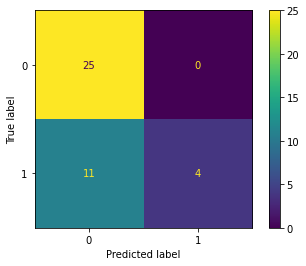

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#plot confusion matrix
plt.figure()
plot_confusion_matrix(LR, X_test, y_test)
